<h1>Introduction to Data Visualization</h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *pandas*](#1)<br>
2. [Matplotlib: Standard Python Visualization Library](#2) <br>
3. [Seaborn](#3)<br>
4. [Line Plots](#4)<br>
5. [Histograms](#5) <br>
6. [Bar Charts](#6) <br>
7. [Pie Charts](#7) <br>
8. [Box Plots](#8) <br>
9. [Scatter Plots](#9) <br>
10. [Bubble Plots](#10) <br> 
</div>

# Exploring Dataset <a id="1"></a>

## The Dataset: Immigration to Canada from 1980 to 2013 

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

Let's clean the data set to remove a few unnecessary columns. Then we rename the columns so that they make sense.

In [4]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, check to see how many null objects we have in the dataset.

In [5]:
df['Total'] = df.sum(axis=1)
df.isnull().sum().any()

False

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.

In [6]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [7]:
df.set_index('Country', inplace=True)

# optional: to remove the name of the index
df.index.name = None

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. 

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [8]:
df.columns = list(map(str, df.columns))

# useful for plotting later on
years = list(map(str, range(1980, 2014)))

## Matplotlib: Standard Python Visualization Library<a id="2"></a>

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer. It is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. We will work both with the scripting and artist layer.

### Two types of plotting

There are two styles/options of ploting with `matplotlib`. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.


**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) **

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "*set_*" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis. 

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots). 

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://ibm.box.com/shared/static/03rhrfcealyoi83tigscovgglfchfyor.png" width=500 align="center">

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that the a 3 digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,
```python
   subplot(211) == subplot(2, 1, 1) 
```
produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

In [9]:
import matplotlib.pyplot as plt

# we are using the inline backend
%matplotlib inline 

In [10]:
print(plt.style.available)
plt.style.use(['ggplot']) # for ggplot-like style

['ggplot', 'dark_background', 'bmh', 'seaborn', 'seaborn-muted', 'grayscale', 'fast', 'seaborn-bright', 'seaborn-talk', 'seaborn-darkgrid', 'seaborn-dark', 'fivethirtyeight', 'Solarize_Light2', 'tableau-colorblind10', 'seaborn-white', 'seaborn-pastel', 'seaborn-whitegrid', 'seaborn-colorblind', '_classic_test', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-poster', 'classic', 'seaborn-paper', 'seaborn-deep', 'seaborn-dark-palette']


## Seaborn<a id="3"></a>

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

We will visualize both of the libraries as we go along, plot them side by side.

In [11]:
import seaborn as sns

## Line Plots (Series/Dataframe) <a id="4"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

First, we will extract the data series for Haiti.

In [12]:
haiti = df.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

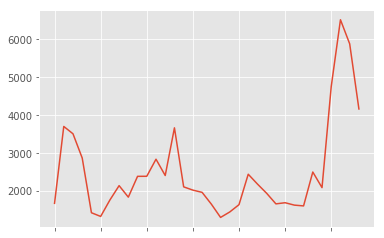

In [13]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type *string*. Therefore, let's change the type of the index values to *integer* for plotting.

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

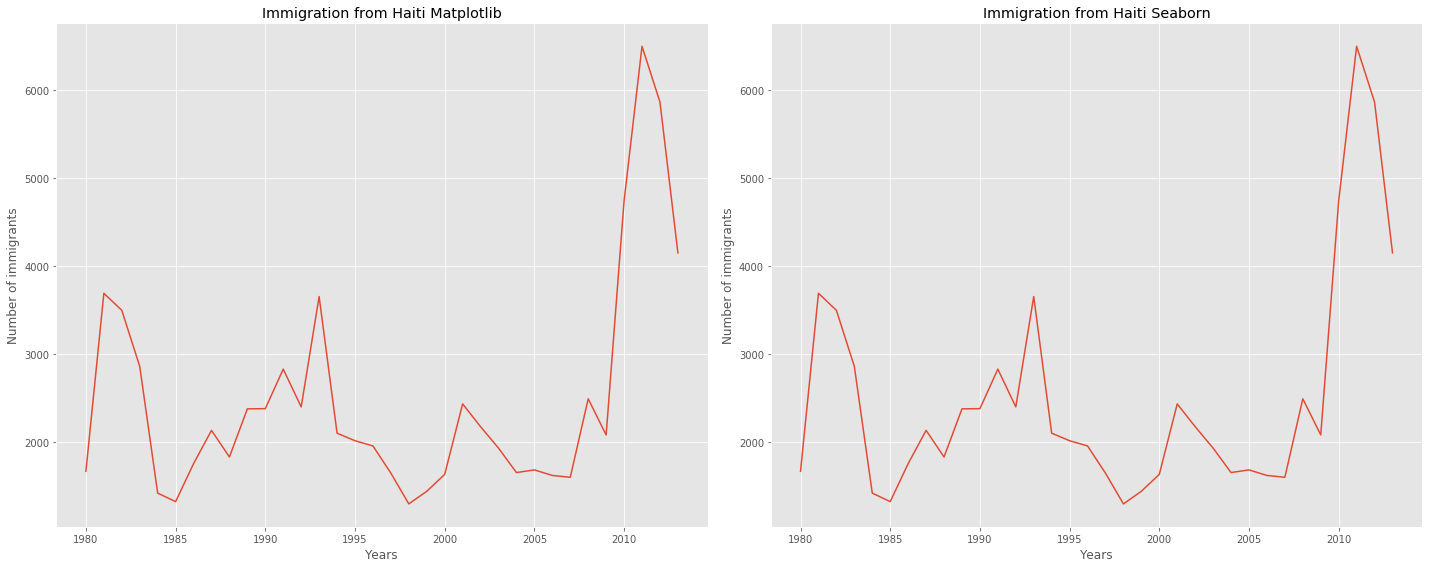

In [14]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti = haiti.astype(int)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
haiti.plot(kind='line',ax=ax)

ax.set_title('Immigration from Haiti Matplotlib')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')

ax = fig.add_subplot(122)
sns.lineplot(x=haiti.index, y=haiti.values, ax=ax)

ax.set_title('Immigration from Haiti Seaborn')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')

plt.tight_layout()
plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` or `ax.text()` method.

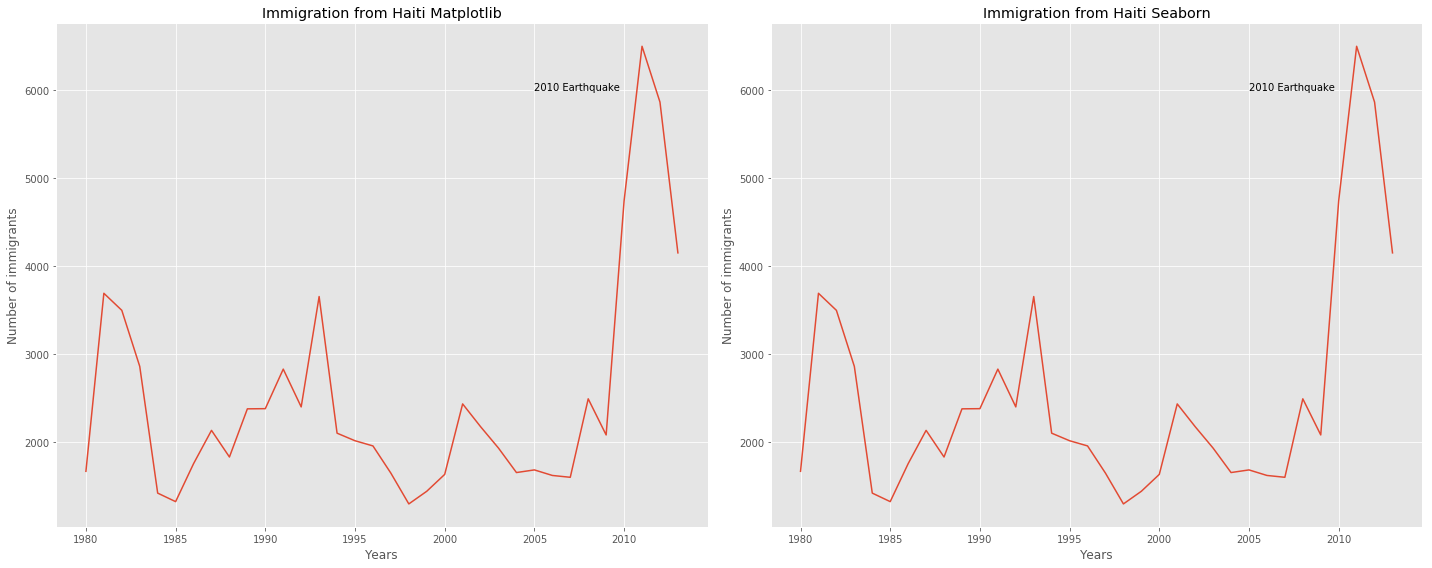

In [15]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
haiti.plot(kind='line',ax=ax)

ax.set_title('Immigration from Haiti Matplotlib')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')
# annotate the 2010 Earthquake. 
# syntax: text(x, y, label)
ax.text(2005, 6000, '2010 Earthquake') # see note below

ax = fig.add_subplot(122)
sns.lineplot(x=haiti.index, y=haiti.values, ax=ax)

ax.set_title('Immigration from Haiti Seaborn')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')

ax.text(2005, 6000, '2010 Earthquake') 

plt.tight_layout()
plt.show() # need this line to show the updates made to the figure

Quick note on x and y values in `plt.text(x, y, label)`:
    
     Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2005, 6000, '2010 Earthquake') # years stored as type int
```
    If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 25th index is year 2005 since it is the 25th year with a base year of 1980.
```python
    plt.text(25, 6000, '2010 Earthquake') # years stored as type str
```

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

Let's compare the number of immigrants from India and China from 1980 to 2013.

Step 1: Get the data set for China and India, and display dataframe.

In [16]:
data = df.loc[['China', 'India'], years]
data.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

`data.plot(kind='line')`

That won't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `data` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe.

In [17]:
data = data.T
data.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

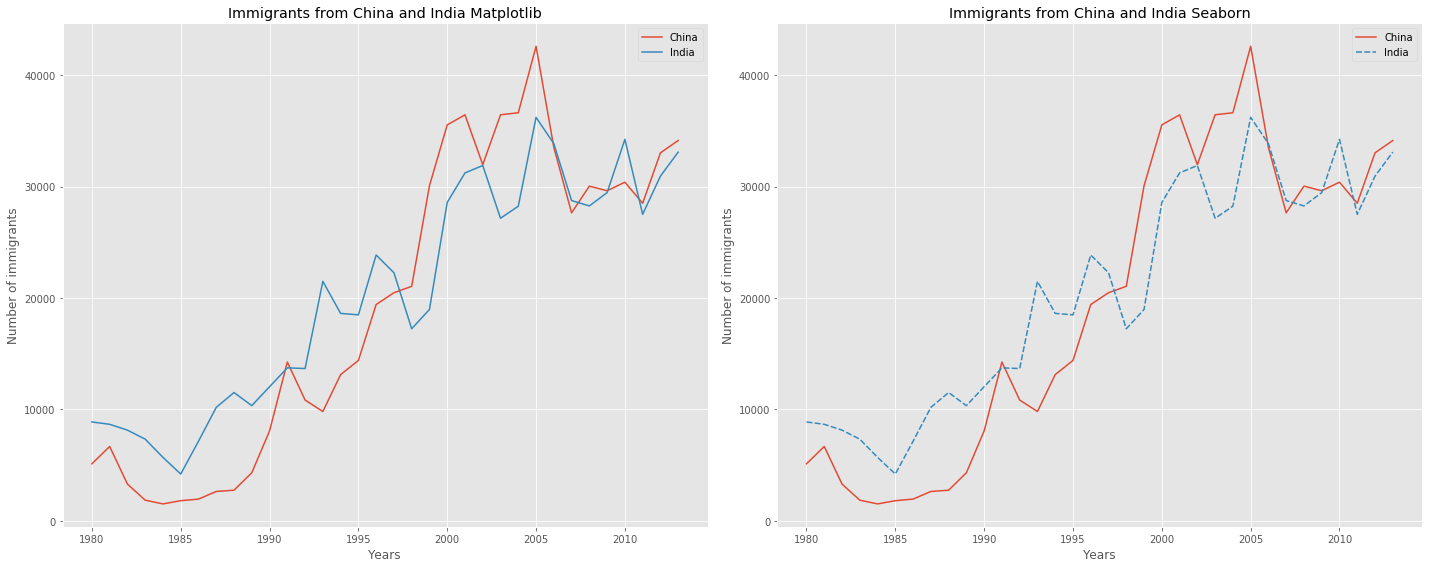

In [18]:
data.index = data.index.map(int) # let's change the index values of data to type integer for plotting
data = data.astype(int)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
data.plot(kind='line', ax=ax)

ax.set_title('Immigrants from China and India Matplotlib')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')


ax = fig.add_subplot(122)
sns.lineplot(data=data, ax=ax)

ax.set_title('Immigrants from China and India Seaborn')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')


plt.tight_layout()
plt.show() # need this line to show the updates made to the figure

From the above plot, we can observe that the China and India have very similar immigration trends through the years. 

So how come we didn't need to transpose Haiti's dataframe before plotting?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below. 
```python
print(type(haiti))
print(haiti.head())
```
>class 'pandas.core.series.Series' <br>
>1980    1666 <br>
>1981    3692 <br>
>1982    3498 <br>
>1983    2860 <br>
>1984    1418 <br>
>Name: Haiti, dtype: int64 <br>

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

Let's compare the trend of top 5 countries that contributed the most to immigration to Canada.

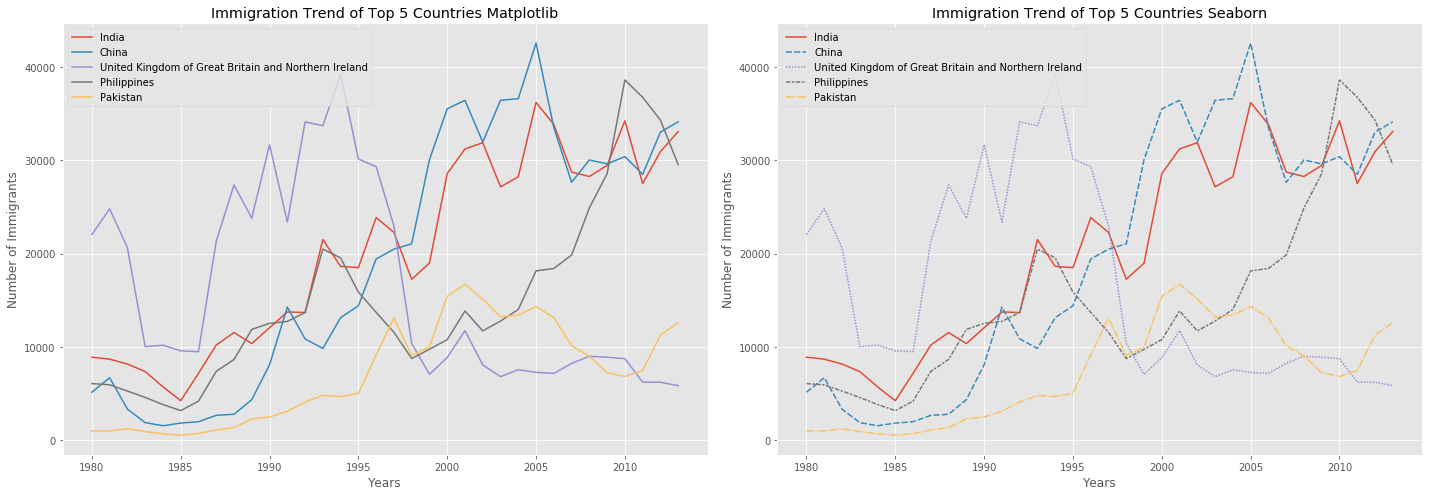

In [19]:
# Step 1: Get the dataset. We will sort on this column to get our top 5 countries 
# using pandas sort_values() method
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].T 

df_top5.index = df_top5.index.map(int) 

# Step 2: Plot the dataframe.
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
df_top5.plot(kind='line', ax=ax) 

ax.set_title('Immigration Trend of Top 5 Countries Matplotlib')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

ax = fig.add_subplot(122)
sns.lineplot(data=df_top5, ax=ax) 

ax.set_title('Immigration Trend of Top 5 Countries Seaborn')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.tight_layout()
plt.show()

### Other Plots

There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

# Histograms<a id="5"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Let's find out the the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013.

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [20]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:
* 178 countries contributed between 0 to 3412.9 immigrants 
* 11 countries contributed between 3412.9 to 6825.8 immigrants
* 1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://ibm.box.com/shared/static/g54s9q97mrjok0h4272o7g09cyigei0v.jpg" align="center" width=800>

/home/fazil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


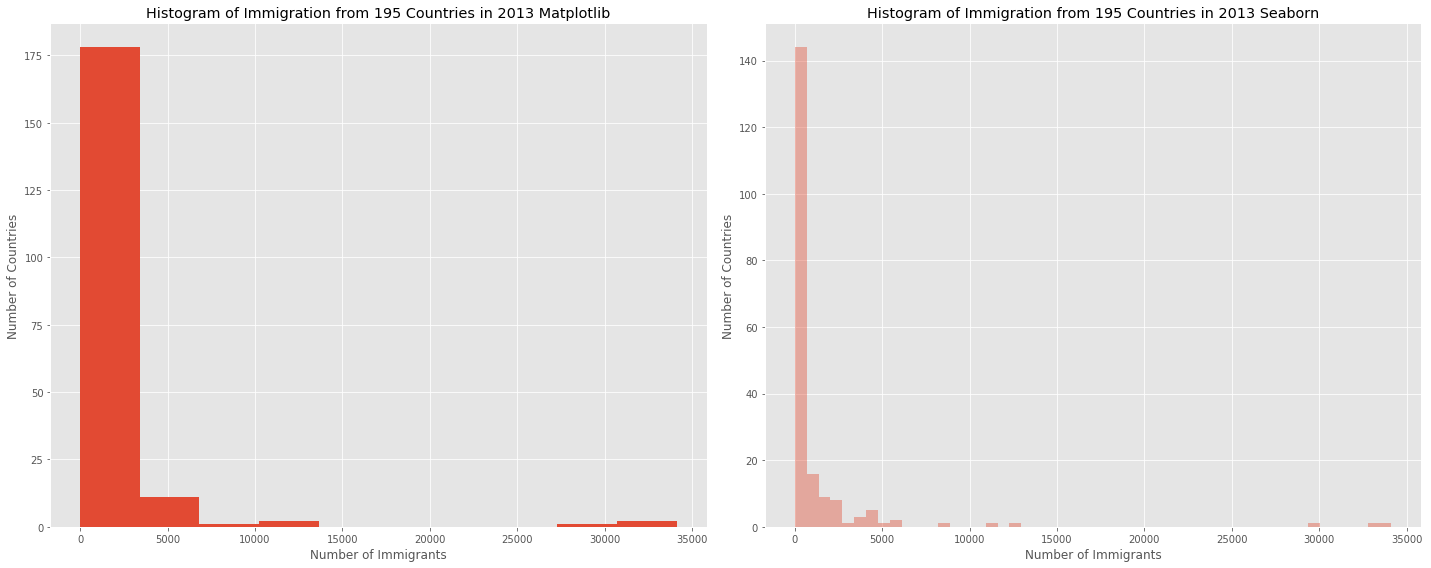

In [21]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df['2013'].plot(kind='hist', ax=ax)

ax.set_title('Histogram of Immigration from 195 Countries in 2013 Matplotlib') 
ax.set_ylabel('Number of Countries') 
ax.set_xlabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.distplot(df['2013'], kde=False, ax=ax) 

ax.set_title('Histogram of Immigration from 195 Countries in 2013 Seaborn') 
ax.set_ylabel('Number of Countries') 
ax.set_xlabel('Number of Immigrants')

plt.tight_layout()
plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population. 

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:

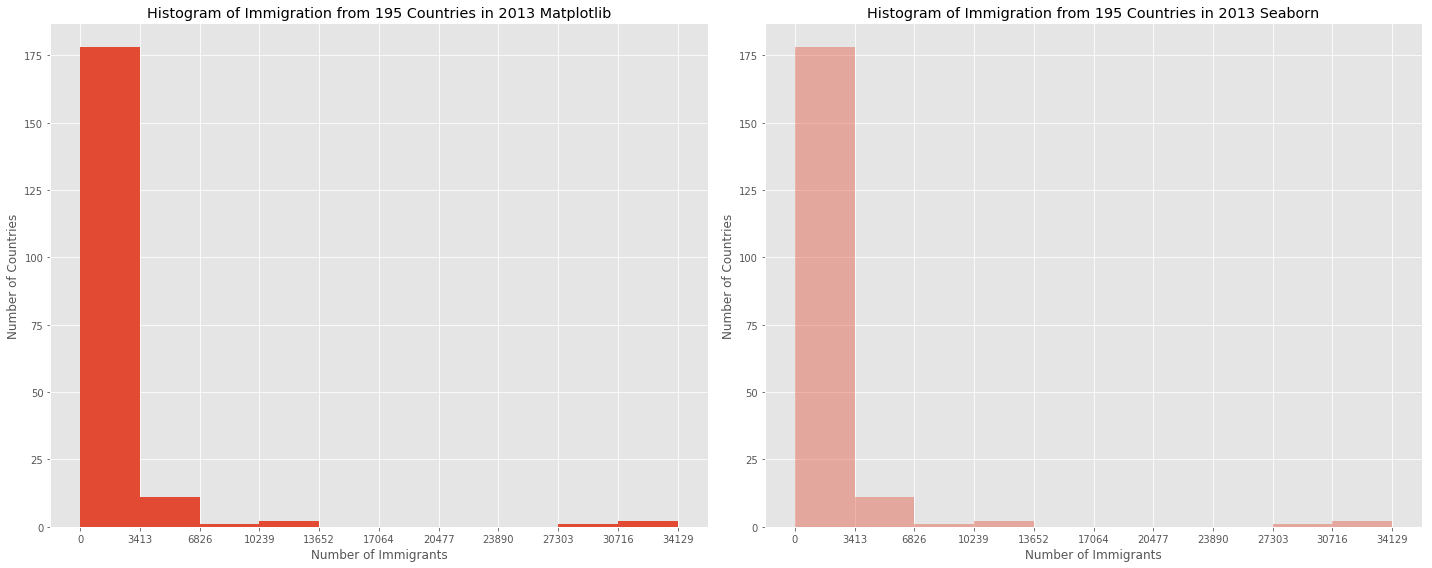

In [22]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df['2013'].plot(kind='hist', ax=ax)

ax.set_xticks(bin_edges)
ax.set_title('Histogram of Immigration from 195 Countries in 2013 Matplotlib') 
ax.set_ylabel('Number of Countries') 
ax.set_xlabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.distplot(df['2013'], kde=False, bins=bin_edges, ax=ax) 

ax.set_xticks(bin_edges)
ax.set_title('Histogram of Immigration from 195 Countries in 2013 Seaborn') 
ax.set_ylabel('Number of Countries') 
ax.set_xlabel('Number of Immigrants')

plt.tight_layout()
plt.show()

*Side Note:* We could use `df['2013'].plot.hist()`, instead. In fact, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same. 

See the *pandas* documentation for more [info](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html).

We can also plot multiple histograms on the same plot. For example, let's try to answer the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013


`df.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()`

That will not work! We'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, *pandas* instead plots the population frequency distribution for the `years`.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [23]:
df.loc[['Denmark', 'Norway', 'Sweden'], years].T.columns.tolist()

['Denmark', 'Norway', 'Sweden']

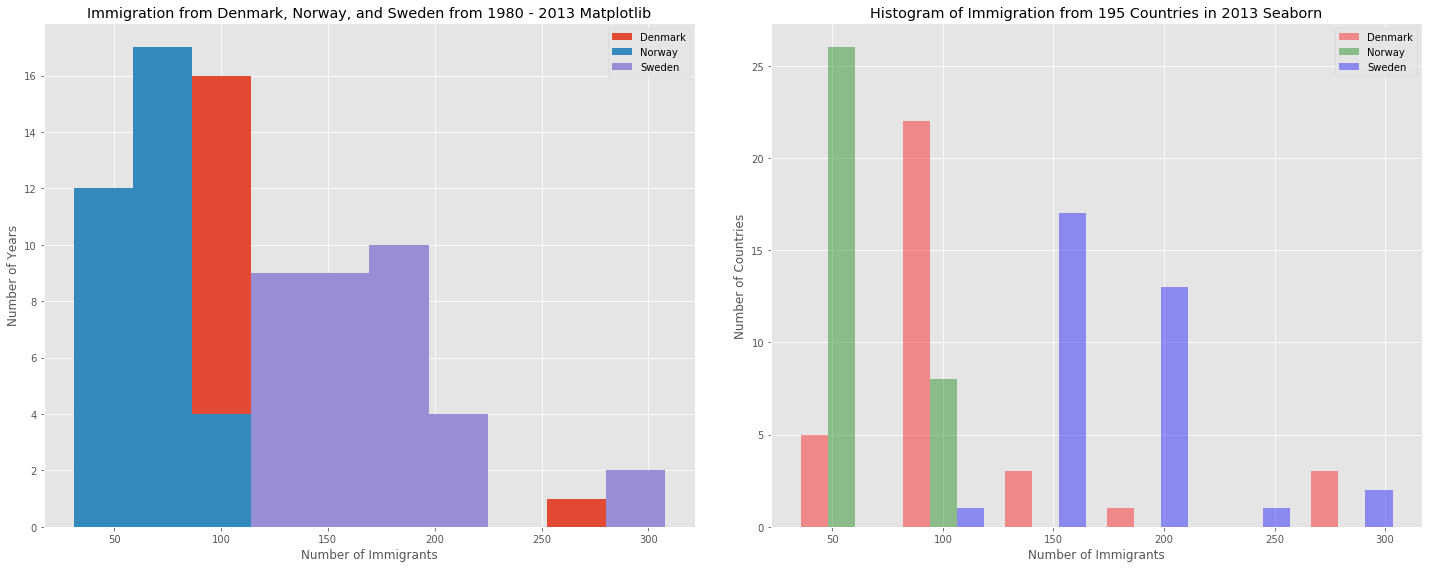

In [24]:
# transpose dataframe
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], years].T

# generate histogram
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_t.plot(kind='hist', ax=ax)

ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013 Matplotlib')
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.distplot(df_t, kde=False, ax=ax, color=['r', 'g', 'b'], label=df_t.columns.tolist()) 

ax.legend()
ax.set_title('Histogram of Immigration from 195 Countries in 2013 Seaborn') 
ax.set_ylabel('Number of Countries') 
ax.set_xlabel('Number of Immigrants')

plt.tight_layout()
plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:
* increase the bin size to 15 by passing in `bins` parameter
* set transparency to 60% by passing in `alpha` paramemter
* label the x-axis by passing in `x-label` paramater
* change the colors of the plots by passing in `color` parameter

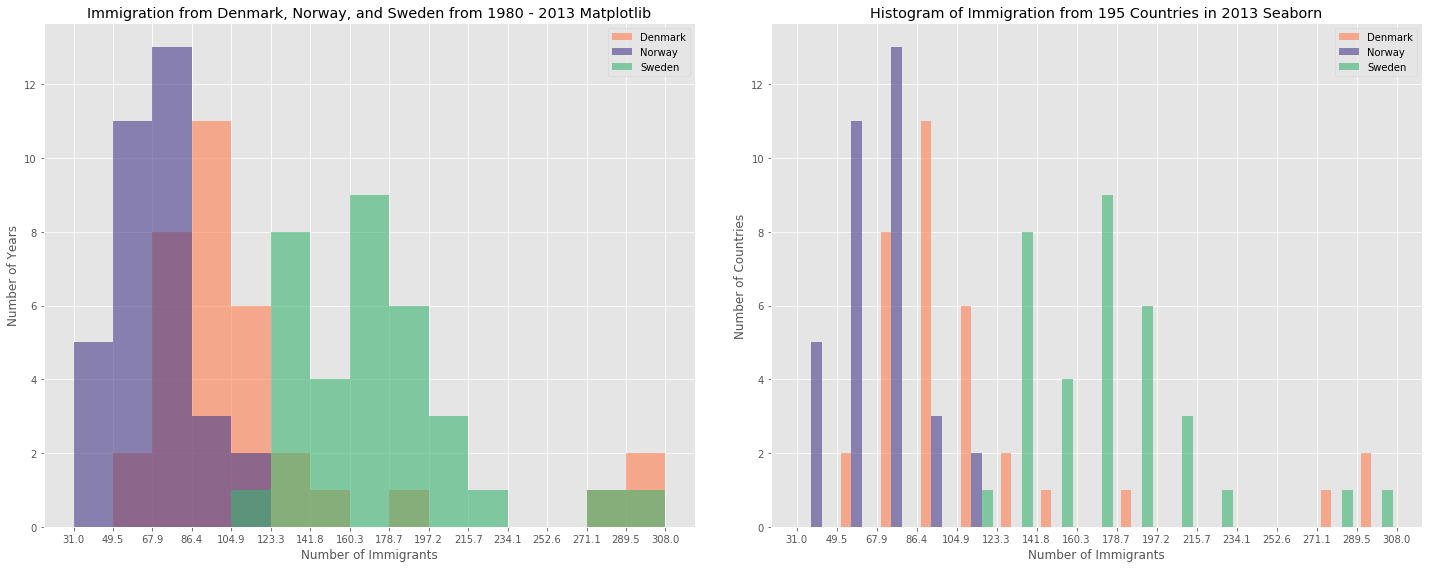

In [25]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_t.plot(kind='hist', bins=15, alpha=0.6, ax=ax, color=['coral', 'darkslateblue', 'mediumseagreen'])

ax.set_xticks(bin_edges)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013 Matplotlib')
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.distplot(df_t, kde=False, bins=15, hist_kws={'alpha':0.6},
             color=['coral', 'darkslateblue', 'mediumseagreen'], ax=ax,
             label=df_t.columns.tolist()) 

ax.legend()
ax.set_xticks(bin_edges)
ax.set_title('Histogram of Immigration from 195 Countries in 2013 Seaborn') 
ax.set_ylabel('Number of Countries') 
ax.set_xlabel('Number of Immigrants')

plt.tight_layout()
plt.show()

For a full listing of colors available in Matplotlib, 
```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

# Bar Charts (Dataframe) <a id="6"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particuarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar. 

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 

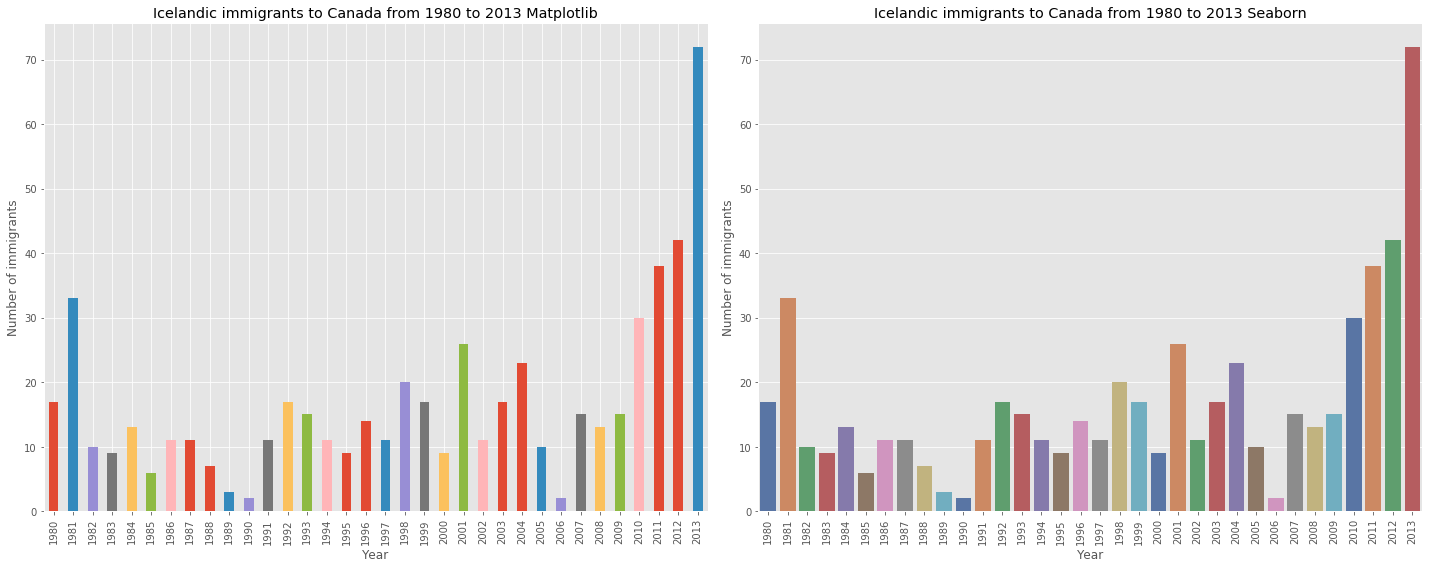

In [27]:
# step 1: get the data
df_iceland = df.loc['Iceland', years]
df_iceland = df_iceland.astype(int)

# step 2: plot data
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_iceland.plot(kind='bar', ax=ax)

ax.set_xlabel('Year') 
ax.set_ylabel('Number of immigrants') 
ax.set_title('Icelandic immigrants to Canada from 1980 to 2013 Matplotlib') 

ax = fig.add_subplot(122)
sns.barplot(x=df_iceland.index, y=df_iceland.values, palette='deep', ax=ax) 

ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Year') 
ax.set_ylabel('Number of immigrants') 
ax.set_title('Icelandic immigrants to Canada from 1980 to 2013 Seaborn') 

plt.tight_layout()
plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method. We will pass in the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.


Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

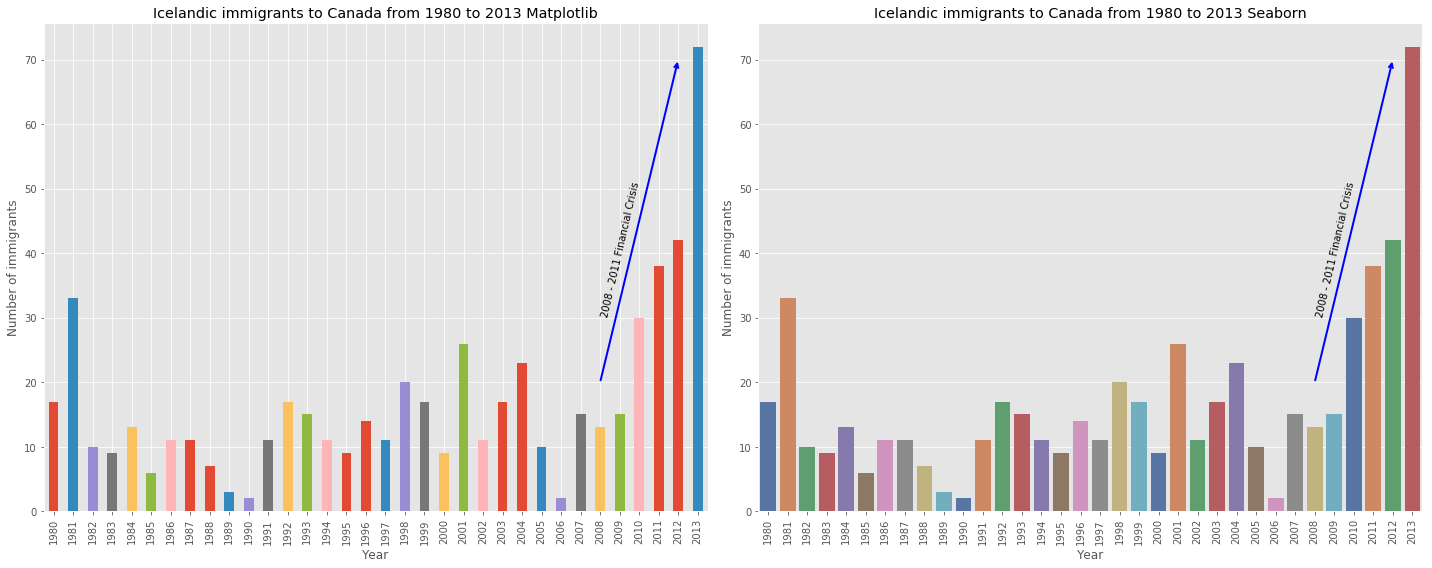

In [31]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_iceland.plot(kind='bar', ax=ax)

ax.set_xlabel('Year') 
ax.set_ylabel('Number of immigrants') 
ax.set_title('Icelandic immigrants to Canada from 1980 to 2013 Matplotlib') 

# Annotate arrow
ax.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Annotate Text
ax.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=77,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

ax = fig.add_subplot(122)
sns.barplot(x=df_iceland.index, y=df_iceland.values, palette='deep', ax=ax) 

ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Year') 
ax.set_ylabel('Number of immigrants') 
ax.set_title('Icelandic immigrants to Canada from 1980 to 2013 Seaborn') 

# Annotate arrow
ax.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Annotate Text
ax.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=77,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.tight_layout()
plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categetorical variables.

Using the scripting layer and the dataset, let's create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013.

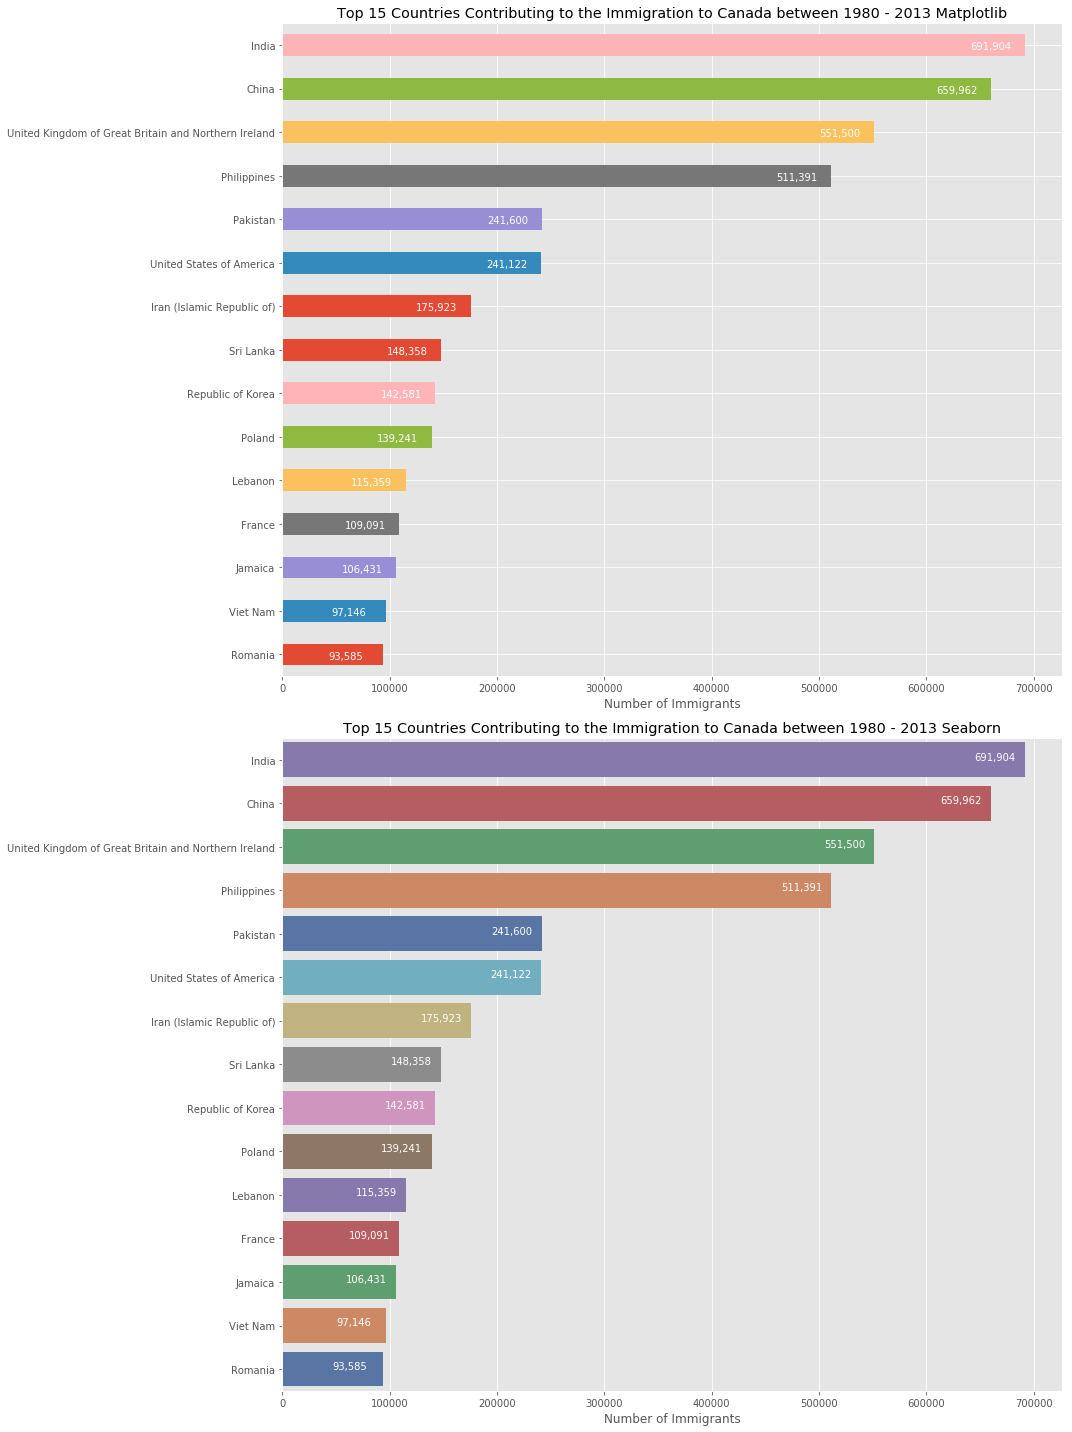

In [59]:
# sort dataframe on 'Total' column (descending)
df.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df['Total'].tail(15)

# generate plot
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
df_top15.plot(kind='barh', ax=ax)

ax.set_xlabel('Number of Immigrants')
ax.set_title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013 Matplotlib')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 57000 from x, and 0.1 from y to make it fit within the bar)
    ax.annotate(label, xy=(value - 51000, index - 0.10), color='white')

ax = fig.add_subplot(212)
sns.barplot(x=df_top15.values, y=df_top15.index, palette='deep', ax=ax)  

ax.set_xlabel('Number of Immigrants')
ax.set_title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013 Seaborn') 

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    ax.annotate(label, xy=(value - 47000, index), color='white')

# invert for largest on top 
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Pie Charts <a id="7"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword. Seaborn doesn't support pie charts so for this part we will only use matplotlib.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013. 

Step 1: Gather data. 

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

<img src="https://ibm.box.com/shared/static/tkfhxqkehfzpclco8f0eazhie33uxj9j.png" height=400 align="center">

In [60]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:
- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

Let's also make a few modifications to improve the visuals:

* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `ax.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.


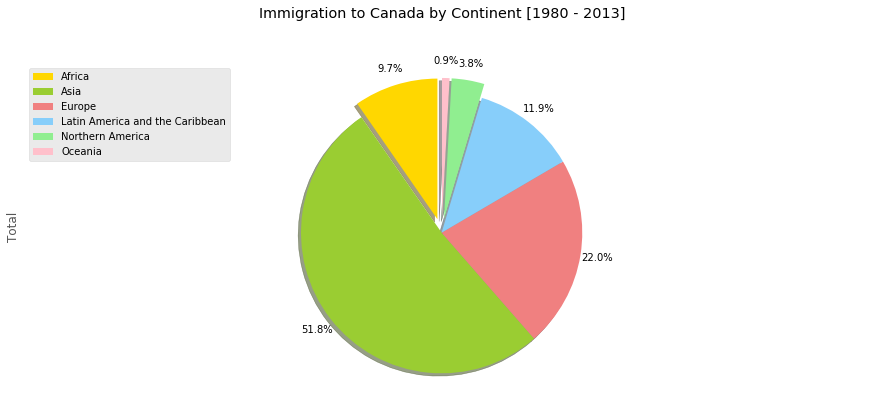

In [61]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Using a pie chart, let's explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

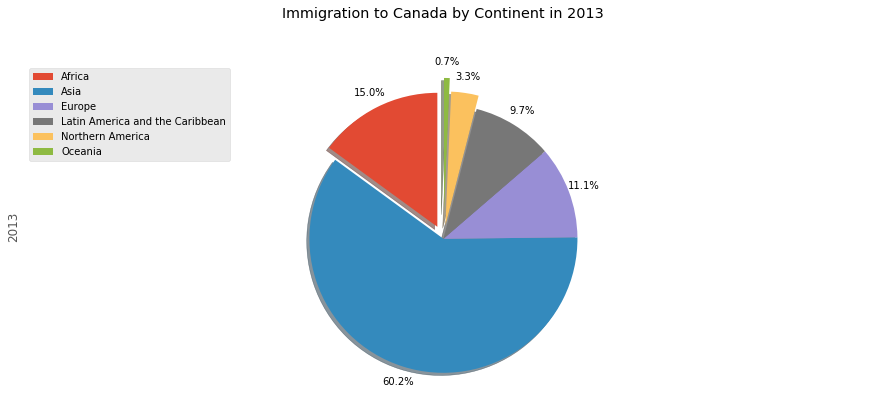

In [62]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

<img src="https://ibm.box.com/shared/static/9nkxsfihu8mgt1go2kfasf61sywlu123.png" width=440, align="center">

To make a `box plot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe. For seaborn we call boxplot function.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.

In [63]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df.loc[['Japan'], years].T
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in `kind='box'`.

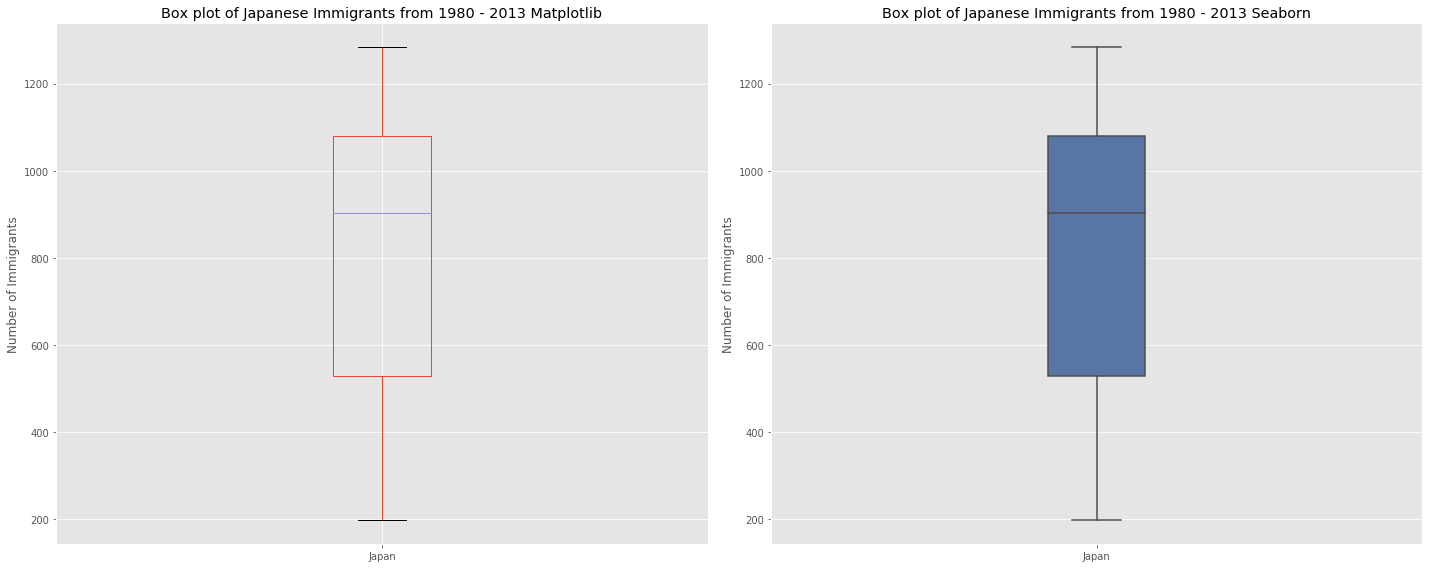

In [67]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_japan.plot(kind='box', ax=ax)

ax.set_title('Box plot of Japanese Immigrants from 1980 - 2013 Matplotlib')
ax.set_ylabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.boxplot(data=df_japan, palette='deep', width=0.15, ax=ax) 

ax.set_title('Box plot of Japanese Immigrants from 1980 - 2013 Seaborn')
ax.set_ylabel('Number of Immigrants') 

plt.tight_layout()
plt.show()

We can immediately make a few key observations from the plot above:
1. The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
2. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.

In [68]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. Let's compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India which we already did and named it as `data`

Let's view the percentages associated with both countries using the `describe()` method.

In [70]:
data.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Step 2: Plot data.

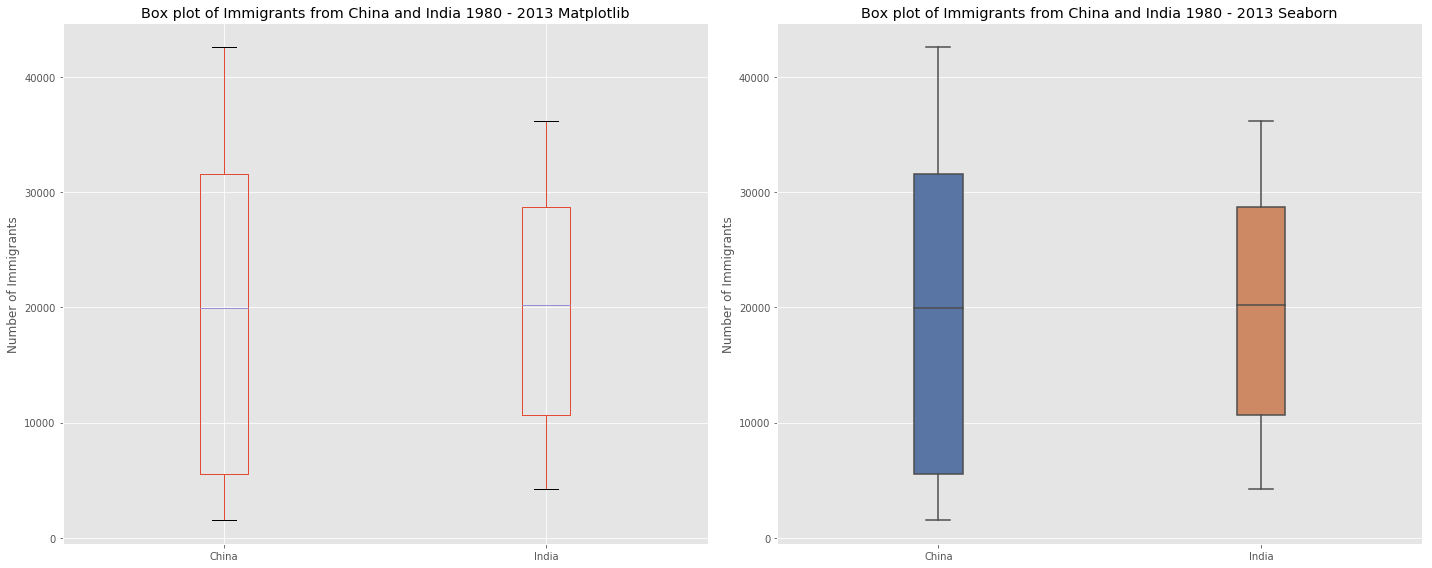

In [71]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
data.plot(kind='box', ax=ax)

ax.set_title('Box plot of Immigrants from China and India 1980 - 2013 Matplotlib')
ax.set_ylabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.boxplot(data=data, palette='deep', width=0.15, ax=ax) 

ax.set_title('Box plot of Immigrants from China and India 1980 - 2013 Seaborn')
ax.set_ylabel('Number of Immigrants') 

plt.tight_layout()
plt.show()

We can observe that, while both countries have around the same median immigrant population (~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to *False*. You can also specify a different color in case you are not a big fan of the default red color.

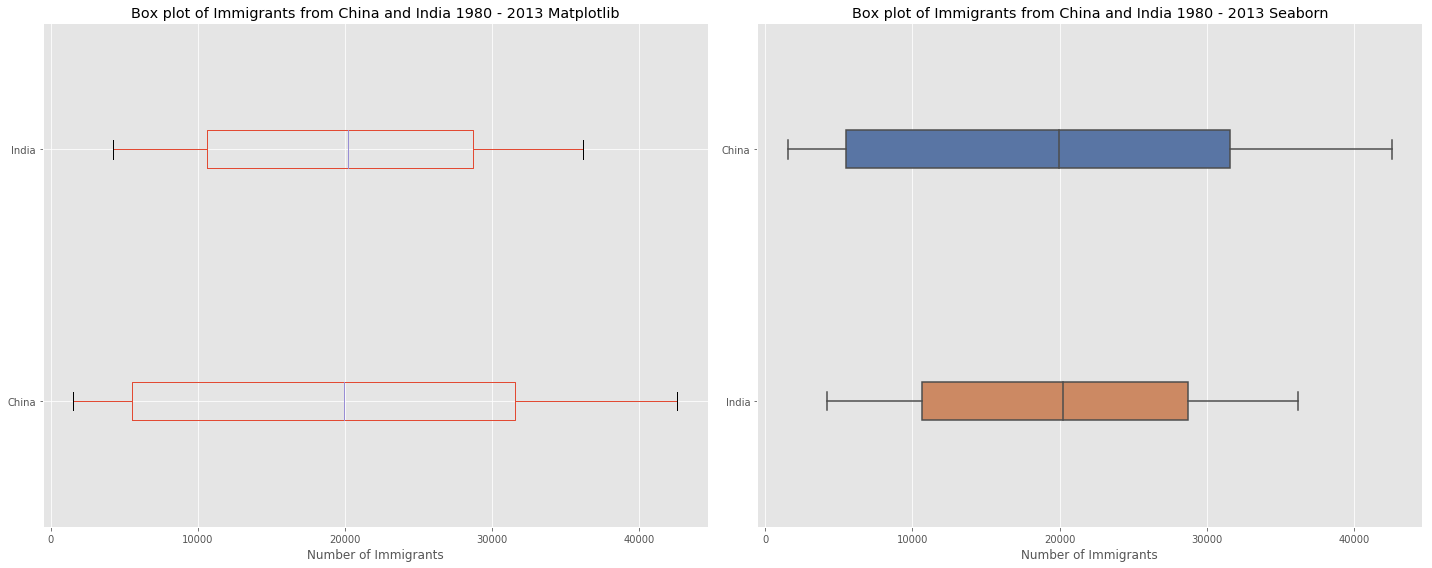

In [73]:
# horizontal box plots
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
data.plot(kind='box', ax=ax, vert=False)

ax.set_title('Box plot of Immigrants from China and India 1980 - 2013 Matplotlib')
ax.set_xlabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.boxplot(data=data, palette='deep', width=0.15, orient='h', ax=ax) 

ax.set_title('Box plot of Immigrants from China and India 1980 - 2013 Seaborn')
ax.set_xlabel('Number of Immigrants') 

plt.tight_layout()
plt.show()

Let's try something a little more advanced. 

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.
Let's create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population.

Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:
   1. Create a list of all years in decades 80's, 90's, and 00's.
   2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
   3. Merge the three series into a new data frame. Call your dataframe **new_df**.

In [77]:
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


Let's learn more about the statistics associated with the dataframe using the `describe()` method.

In [78]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Step 3: Plot the box plots.

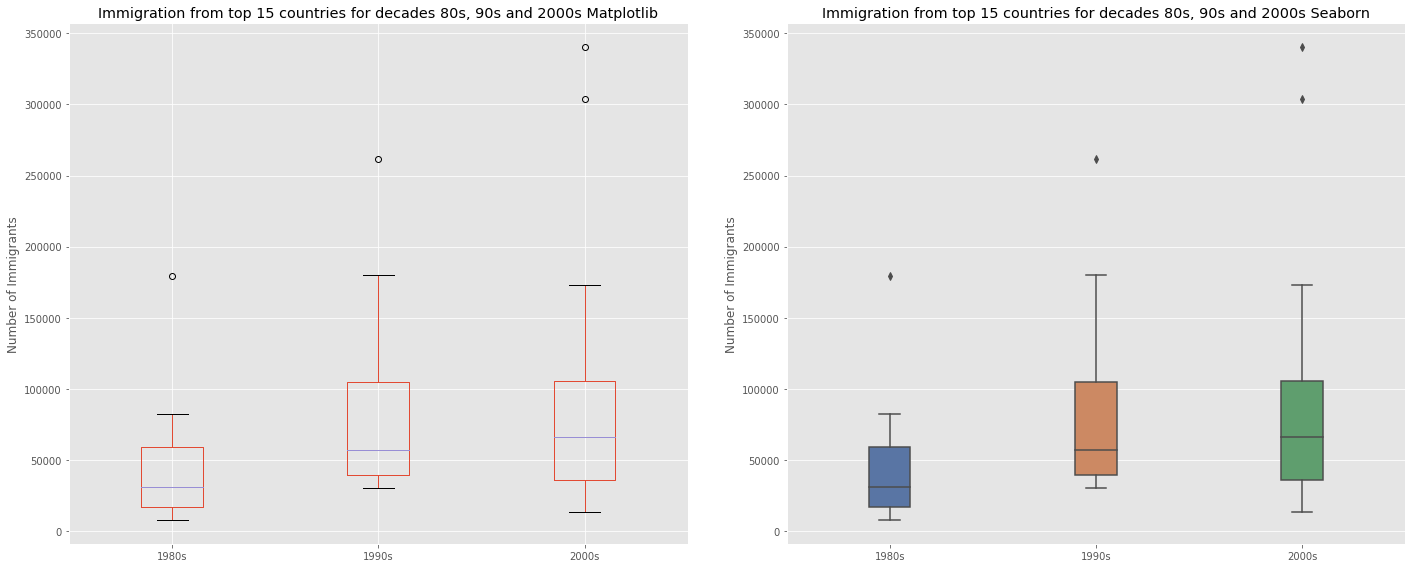

In [80]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
new_df.plot(kind='box', ax=ax)

ax.set_title('Immigration from top 15 countries for decades 80s, 90s and 2000s Matplotlib')
ax.set_ylabel('Number of Immigrants') 

ax = fig.add_subplot(122)
sns.boxplot(data=new_df, palette='deep', width=0.20, ax=ax) 

ax.set_title('Immigration from top 15 countries for decades 80s, 90s and 2000s Seaborn')
ax.set_ylabel('Number of Immigrants') 

plt.tight_layout()
plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>
* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>
* Q1 (25%) = 36,101.5 <br>
* Q3 (75%) = 105,505.5 <br>
* IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5

In [81]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5. 

# Scatter Plots <a id="9"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.

In [82]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

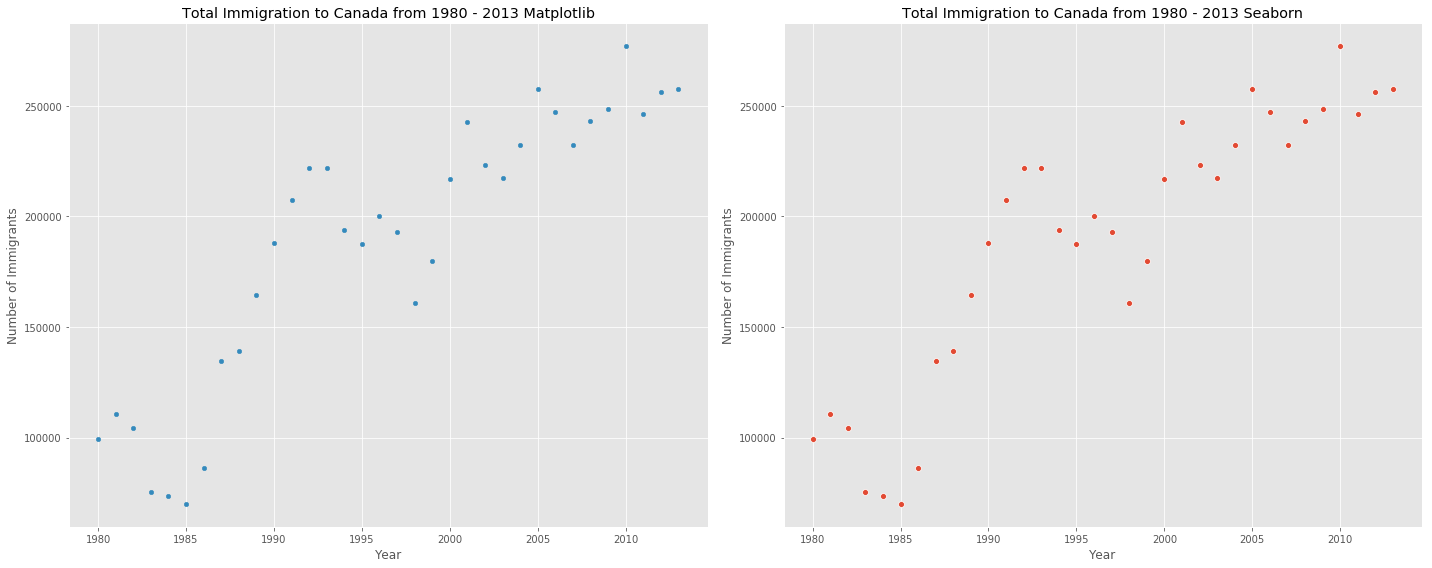

In [83]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_tot.plot(kind='scatter', x='year', y='total', ax=ax)

ax.set_title('Total Immigration to Canada from 1980 - 2013 Matplotlib')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

ax = fig.add_subplot(122)
sns.scatterplot(x=df_tot.year, y=df_tot.total, palette='deep', ax=ax) 

ax.set_title('Total Immigration to Canada from 1980 - 2013 Seaborn')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants') 

plt.tight_layout()
plt.show()

Notice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit). 

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015. The below steps, we don't need to do it for seaborn as it has a `regplot` function which will do it.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:
- `x`: x-coordinates of the data. 
- `y`: y-coordinates of the data. 
- `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [84]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1. 

Step 2: Plot the regression line on the `scatter plot`.

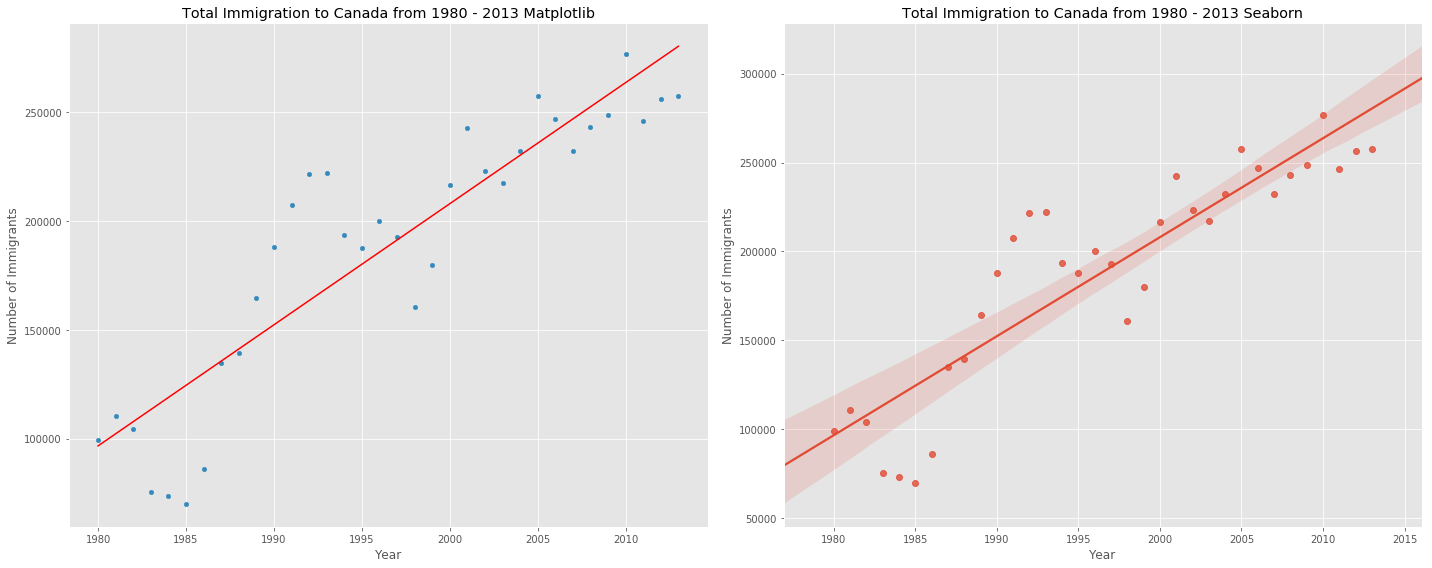

In [88]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_tot.plot(kind='scatter', x='year', y='total', ax=ax)

ax.set_title('Total Immigration to Canada from 1980 - 2013 Matplotlib')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

# plot line of best fit
ax.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

ax = fig.add_subplot(122)
sns.regplot(x=df_tot.year, y=df_tot.total, ax=ax) 

ax.set_title('Total Immigration to Canada from 1980 - 2013 Seaborn')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants') 

plt.tight_layout()
plt.show()

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```
When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

Let's create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

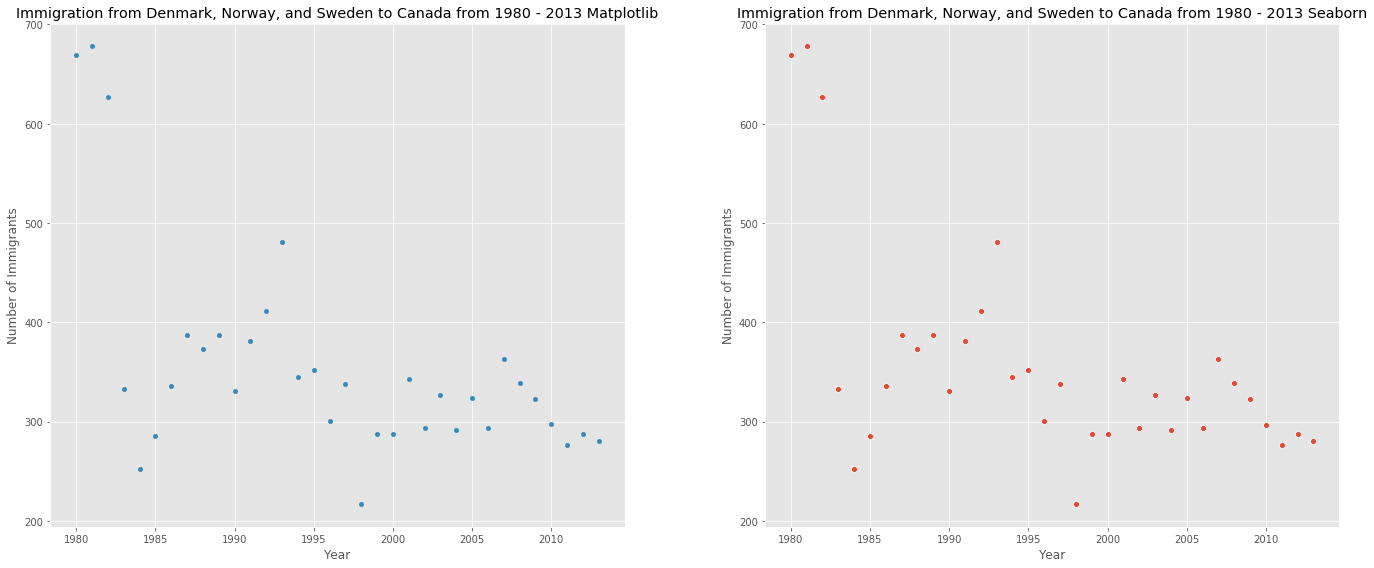

In [91]:
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].T

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

# generate scatter plot
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
df_total.plot(kind='scatter', x='year', y='total', ax=ax)

ax.set_title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013 Matplotlib')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

ax = fig.add_subplot(122)
sns.scatterplot(x=df_total.year, y=df_total.total, palette='deep', ax=ax) 

ax.set_title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013 Seaborn')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

plt.tight_layout()
plt.show()

# Bubble Plots <a id="10"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `matplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

Step 1: Get the data for Brazil and Argentina. We will convert the `Years` to type int and bring it in the dataframe.

In [92]:
df_t = df[years].T

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t.head()

,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1].

In [96]:
from sklearn.preprocessing import MinMaxScaler

scale_bra = MinMaxScaler()
scale_arg = MinMaxScaler()
norm_brazil = scale_bra.fit_transform(df_t['Brazil'].values.reshape(-1, 1))
norm_arg = scale_arg.fit_transform(df_t['Argentina'].values.reshape(-1, 1))

/home/fazil/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fazil/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Step 3: Plot the data. 
- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

In [108]:
# df_t.loc[:, ['Year', 'Argentina']]
df_t['weight_arg'] = norm_arg
df_t['weight_brazil'] = norm_brazil
df_t.loc[:, ['Year', 'Argentina', 'Brazil', 'weight_arg', 'weight_brazil']]

,Year,Argentina,Brazil,weight_arg,weight_brazil
0,1980,368,211,0.111039,0.032820
1,1981,426,220,0.148483,0.036467
2,1982,626,192,0.277598,0.025122
3,1983,241,139,0.029051,0.003647
4,1984,237,145,0.026469,0.006078
5,1985,196,130,0.000000,0.000000
6,1986,213,205,0.010975,0.030389
7,1987,519,244,0.208522,0.046191
8,1988,374,394,0.114913,0.106969
9,1989,538,650,0.220788,0.210697


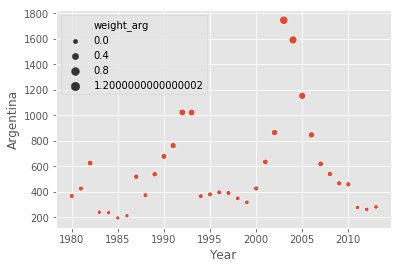

In [109]:
sns.scatterplot(x=df_t['Year'], y=df_t['Argentina'], size=df_t['weight_arg'])

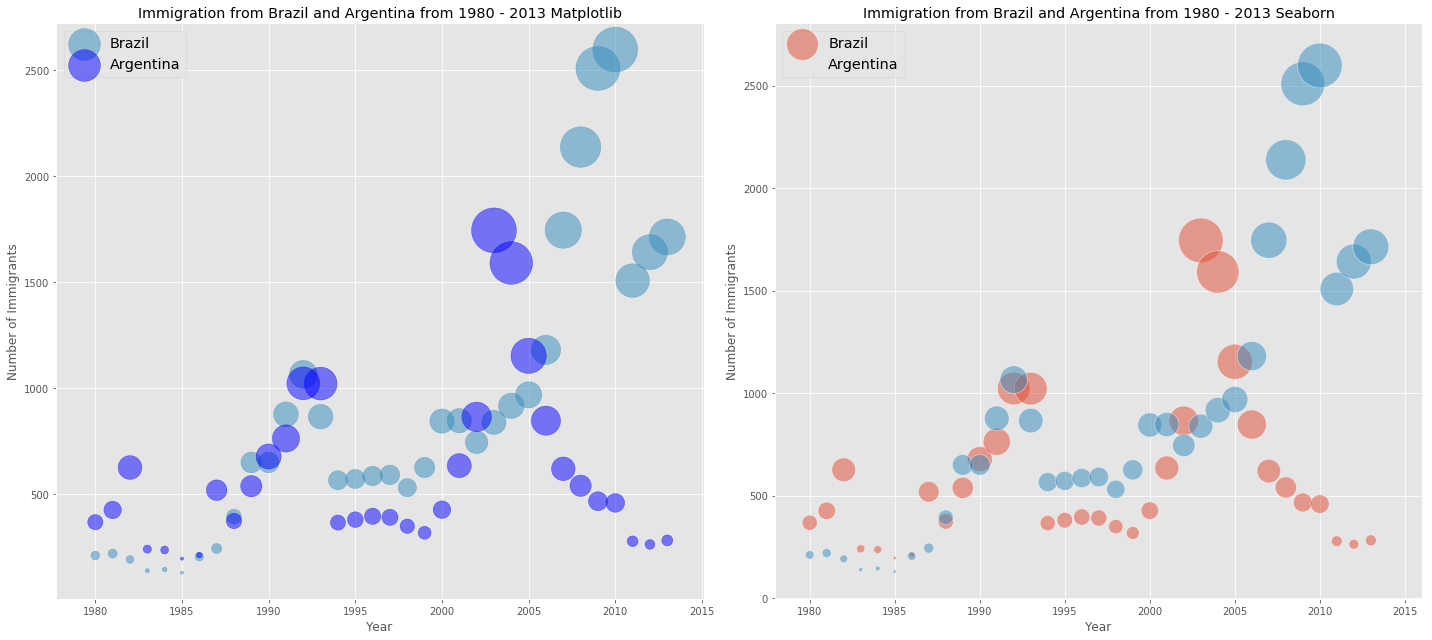

In [127]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(121)

# Brazil
df_t.plot(kind='scatter', x='Year', y='Brazil',
            alpha=0.5,                  # transparency
            s=norm_brazil * 2000 + 10,  # pass in weights 
            ax=ax)

# Argentina
df_t.plot(kind='scatter', x='Year', y='Argentina',
            alpha=0.5,
            color="blue",
            s=norm_arg * 2000 + 10,
            ax=ax)

ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration from Brazil and Argentina from 1980 - 2013 Matplotlib')
ax.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

ax = fig.add_subplot(122)
sns.scatterplot(x=df_t['Year'], y=df_t['Argentina'], palette='deep', 
                size=df_t['weight_arg'], sizes=(10, 2000), alpha=0.5, ax=ax)
sns.scatterplot(x=df_t['Year'], y=df_t['Brazil'], palette='deep', 
                size=df_t['weight_brazil'], sizes=(10, 2000), alpha=0.5, ax=ax) 

ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration from Brazil and Argentina from 1980 - 2013 Seaborn')
ax.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

plt.tight_layout()
plt.show()

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression. 

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.